<a href="https://colab.research.google.com/github/widyasitopu/clustering-kmeans/blob/main/Analisis_Algoritma_KMeans_untuk_Klasterisasi_Vaksinasi_COVID_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set(style="darkgrid")
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

In [9]:
df = pd.read_csv("/data_vaksinasi.csv")
df.head()

,PD1,PD2,PD3
0,0.23,0.21,0.25
1,0.45,0.41,0.44
2,0.33,0.47,0.51
3,0.12,0.11,0.35
4,0.55,0.71,0.73


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PD1     33 non-null     float64
 1   PD2     33 non-null     float64
 2   PD3     33 non-null     float64
dtypes: float64(3)
memory usage: 920.0 bytes


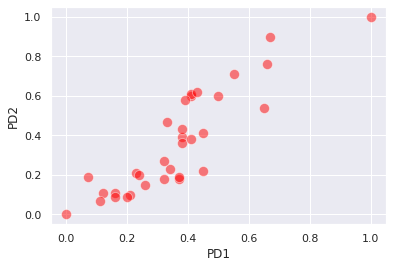

In [12]:
sns.scatterplot(x="PD1", y="PD2", data=df, s=100, color="red", alpha = 0.5)

In [13]:
df_x = df.iloc[:, 0:10]
df_x.head()

,PD1,PD2,PD3
0,0.23,0.21,0.25
1,0.45,0.41,0.44
2,0.33,0.47,0.51
3,0.12,0.11,0.35
4,0.55,0.71,0.73


In [14]:
x_array = np.array(df_x)
print(x_array)

[[0.23 0.21 0.25]
 [0.45 0.41 0.44]
 [0.33 0.47 0.51]
 [0.12 0.11 0.35]
 [0.55 0.71 0.73]
 [0.41 0.6  0.59]
 [0.37 0.18 0.23]
 [0.21 0.1  0.33]
 [0.24 0.2  0.37]
 [0.26 0.15 0.24]
 [0.32 0.18 0.34]
 [0.07 0.19 0.39]
 [0.11 0.07 0.34]
 [0.34 0.23 0.  ]
 [0.16 0.11 0.22]
 [0.38 0.39 0.49]
 [0.38 0.36 0.6 ]
 [0.66 0.76 0.97]
 [0.67 0.9  1.  ]
 [0.2  0.09 0.38]
 [0.   0.   0.24]
 [0.32 0.27 0.47]
 [0.16 0.09 0.34]
 [0.41 0.61 0.61]
 [0.39 0.58 0.67]
 [0.38 0.43 0.36]
 [0.65 0.54 0.24]
 [0.5  0.6  0.34]
 [0.37 0.19 0.24]
 [0.43 0.62 0.49]
 [1.   1.   0.79]
 [0.45 0.22 0.35]
 [0.41 0.38 0.4 ]]


In [15]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x_array)
x_scaled

array([[0.23, 0.21, 0.25],
       [0.45, 0.41, 0.44],
       [0.33, 0.47, 0.51],
       [0.12, 0.11, 0.35],
       [0.55, 0.71, 0.73],
       [0.41, 0.6 , 0.59],
       [0.37, 0.18, 0.23],
       [0.21, 0.1 , 0.33],
       [0.24, 0.2 , 0.37],
       [0.26, 0.15, 0.24],
       [0.32, 0.18, 0.34],
       [0.07, 0.19, 0.39],
       [0.11, 0.07, 0.34],
       [0.34, 0.23, 0.  ],
       [0.16, 0.11, 0.22],
       [0.38, 0.39, 0.49],
       [0.38, 0.36, 0.6 ],
       [0.66, 0.76, 0.97],
       [0.67, 0.9 , 1.  ],
       [0.2 , 0.09, 0.38],
       [0.  , 0.  , 0.24],
       [0.32, 0.27, 0.47],
       [0.16, 0.09, 0.34],
       [0.41, 0.61, 0.61],
       [0.39, 0.58, 0.67],
       [0.38, 0.43, 0.36],
       [0.65, 0.54, 0.24],
       [0.5 , 0.6 , 0.34],
       [0.37, 0.19, 0.24],
       [0.43, 0.62, 0.49],
       [1.  , 1.  , 0.79],
       [0.45, 0.22, 0.35],
       [0.41, 0.38, 0.4 ]])

In [16]:
kmeans = KMeans(n_clusters = 4, random_state=123)

In [17]:
kmeans.fit(x_scaled)

KMeans(n_clusters=4, random_state=123)

In [18]:
print(kmeans.cluster_centers_)

[[0.425      0.407      0.42      ]
 [0.77666667 0.88666667 0.92      ]
 [0.21066667 0.14       0.284     ]
 [0.438      0.624      0.618     ]]


In [19]:
print(kmeans.labels_)

[2 0 0 2 3 3 2 2 2 2 2 2 2 2 2 0 0 1 1 2 2 0 2 3 3 0 0 0 2 3 1 0 0]


In [20]:
df["cluster"] = kmeans.labels_
df.head()

,PD1,PD2,PD3,cluster
0,0.23,0.21,0.25,2
1,0.45,0.41,0.44,0
2,0.33,0.47,0.51,0
3,0.12,0.11,0.35,2
4,0.55,0.71,0.73,3


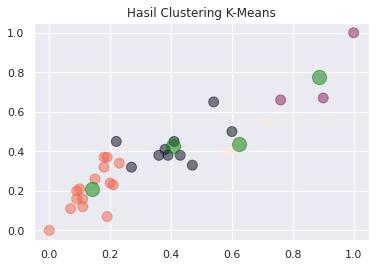

In [21]:
plt.figure
sct = plt.scatter(x_scaled[:,1], x_scaled[:,0], s = 100, c = df.cluster, marker = "o", alpha = 0.5)
centers = kmeans.cluster_centers_
plt.scatter(centers[:,1], centers[:,0], c='green', s=200, alpha=0.5);
plt.title("Hasil Clustering K-Means")
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


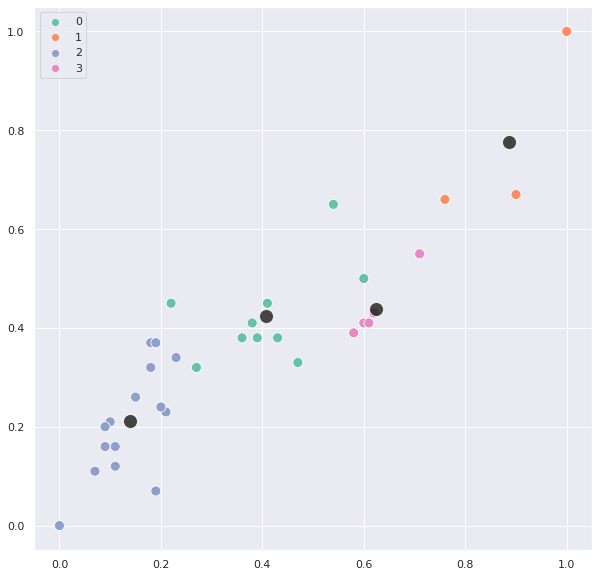

In [22]:
plt.figure(figsize=[10,10])
sns.scatterplot(x_scaled[:,1], x_scaled[:,0], hue = df.cluster, palette="Set2", s = 100, alpha = 1)
sns.scatterplot(centers[:,1], centers[:,0], color = "k", s = 200, alpha = 0.8);